# Predicting the Survival possibility in a Titanic Ship


1. **Import initial packages**

In [100]:
import pandas as pd
import numpy as np

2. **Importing training data**

In [101]:
df_train = pd.read_csv('C:/Users/jayva/OneDrive/Desktop/Data Science with Python/Titanic/train.csv')

In [102]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. **Plotting Histogram to see the data spread and distribution**

<AxesSubplot:ylabel='Frequency'>

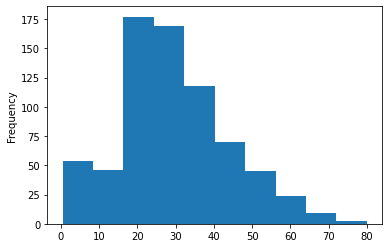

In [104]:
df_train['Age'].plot.hist()

The Data is slightly right skewed and otherwise normally distributed but have to statistically check

4. **Getting the mean of Age and filling up blank cells with it**

In [105]:
df_train['Age'].mean()

29.69911764705882

In [106]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [107]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

5. **Importing other required packages for LogisticRegression**

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [109]:
x=df_train[['Age','Fare','SibSp','Pclass','Parch']]
y=df_train['Survived']

In [110]:
x

Age     Fare  SibSp  Pclass  Parch
0    22.000000   7.2500      1       3      0
1    38.000000  71.2833      1       1      0
2    26.000000   7.9250      0       3      0
3    35.000000  53.1000      1       1      0
4    35.000000   8.0500      0       3      0
..         ...      ...    ...     ...    ...
886  27.000000  13.0000      0       2      0
887  19.000000  30.0000      0       1      0
888  29.699118  23.4500      1       3      2
889  26.000000  30.0000      0       1      0
890  32.000000   7.7500      0       3      0

[891 rows x 5 columns]

6. **Using Logit function to get Regression results**

In [111]:
titanic_model=sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.601420
         Iterations 6


In [112]:
titanic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 Jun 2022   Pseudo R-squ.:                 0.09685
Time:                        07:29:28   Log-Likelihood:                -535.87
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.477e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0118      0.005     -2.469      0.014      -0.021      -0.002
Fare           0.0145      0.003      5.531      0.000       0.009       0.020
SibSp         -0.2245      0.083     -2.712      0.007      -0.387      -0.062
Pclass        -0.2622      0.058     -4.506      0.000      -0.376      -0.148
Parch          0.1916      0.100      1.919      0.055      -0.004       0.387
==============================================================================
"""

7. **Importing the test data**

In [113]:
df_test=pd.read_csv('C:/Users/jayva/OneDrive/Desktop/Data Science with Python/Titanic/test.csv')

In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


8. **Getting the mean of Age and Fare and filling the blank cells with it**

In [115]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [116]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [117]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [118]:
x1=df_test[['Age','Fare','SibSp','Pclass','Parch']]

In [119]:
x1

Age      Fare  SibSp  Pclass  Parch
0    34.50000    7.8292      0       3      0
1    47.00000    7.0000      1       3      0
2    62.00000    9.6875      0       2      0
3    27.00000    8.6625      0       3      0
4    22.00000   12.2875      1       3      1
..        ...       ...    ...     ...    ...
413  30.27259    8.0500      0       3      0
414  39.00000  108.9000      0       1      0
415  38.50000    7.2500      0       3      0
416  30.27259    8.0500      0       3      0
417  30.27259   22.3583      1       3      1

[418 rows x 5 columns]

9. **Using the predict function to get the survival possibility**

In [120]:
prediction=titanic_model.predict(x1)

In [121]:
prediction

0      0.253166
1      0.187502
2      0.246324
3      0.272712
4      0.288622
         ...   
413    0.263368
414    0.701362
415    0.242769
416    0.263368
417    0.298566
Length: 418, dtype: float64